In [1]:
# import the libraries

# library for processing linear algebra
import numpy as np  

# library for data processing
import pandas as pd 


# for Data Visualization 
import matplotlib.pyplot as plt  
import seaborn as sns    


import os
import warnings

from IPython.display import display

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#load dataset libraries
from sklearn import datasets
from sklearn.decomposition import PCA

In [3]:
# Dataset used is iris
iris = datasets.load_iris()


In [31]:
X = iris.data
y = iris.target

In [7]:
X.shape
y.shape

(150, 4)

(150,)

In [8]:
# Reducing the number of dimentions to 2 
pca = PCA(n_components=2)

In [10]:
pca.fit(X)

PCA(n_components=2)

In [12]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [15]:
z = pca.transform(X)

In [16]:
z.shape

(150, 2)

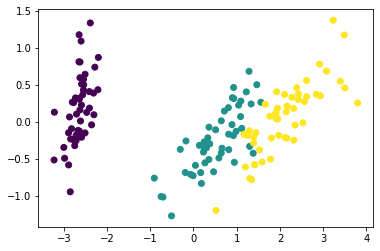

In [17]:
plt.scatter(z[:,0], z[:,1], c=y)

In [26]:
# the dataset after applying pca
col_1 = z[:,0]
col_2 = z[:,1]

In [27]:
data = pd.DataFrame(col_1, col_2).reset_index()
data.columns

Index(['index', 0], dtype='object')

In [28]:
data.rename(columns={'index':'dim_1', 0:'dim_2'}, inplace=True)

In [29]:
data.columns

Index(['dim_1', 'dim_2'], dtype='object')

In [30]:
data.head()

,dim_1,dim_2
0,0.319397,-2.684126
1,-0.177001,-2.714142
2,-0.144949,-2.888991
3,-0.318299,-2.745343
4,0.326755,-2.728717


In [49]:
y_data = pd.DataFrame(y)
y_data.head(2)

,0
0,0
1,0


In [50]:
new_data = pd.concat([data, y_data], axis=1, ignore_index=True).rename(columns={0:'x', 1:'y', 2:'clusters'})

In [51]:
new_data.head()

,x,y,clusters
0,0.319397,-2.684126,0
1,-0.177001,-2.714142,0
2,-0.144949,-2.888991,0
3,-0.318299,-2.745343,0
4,0.326755,-2.728717,0


In [53]:
new_data['clusters'].value_counts()

2    50
1    50
0    50
Name: clusters, dtype: int64

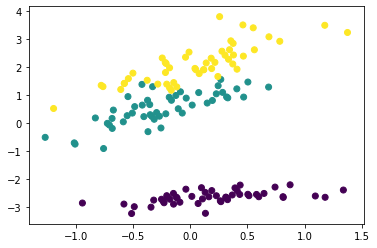

In [56]:
plt.scatter(new_data['x'], new_data['y'], c = new_data['clusters'], cmap = 'viridis')

### segment into clusters

In [66]:
#import Libraries
from sklearn.cluster import KMeans

# getting all the columns to same scale
from sklearn.preprocessing import StandardScaler              

In [60]:
X = new_data[['x', 'y']]
y = new_data['clusters']

In [62]:
scaler = StandardScaler()
X =  scaler.fit_transform(X)
X

array([[ 0.65054141, -1.30971087],
       [-0.36051227, -1.32435711],
       [-0.29522986, -1.40967409],
       [-0.64830449, -1.33958163],
       [ 0.66552653, -1.33146886],
       [ 1.50992585, -1.11293846],
       [-0.18221302, -1.37627274],
       [ 0.33277896, -1.28141939],
       [-1.17789289, -1.4084016 ],
       [-0.23173293, -1.30416299],
       [ 1.3138624 , -1.22325714],
       [ 0.03000162, -1.2748859 ],
       [-0.47887104, -1.35947347],
       [-1.04159745, -1.57304515],
       [ 2.40088235, -1.29049784],
       [ 2.72533645, -1.16426043],
       [ 1.65117453, -1.28014238],
       [ 0.6351676 , -1.29222826],
       [ 1.7777797 , -1.07339558],
       [ 1.04600854, -1.26280003],
       [ 0.79708495, -1.12728243],
       [ 0.88191703, -1.24119316],
       [ 0.27184488, -1.56920777],
       [ 0.20104806, -1.12361159],
       [-0.07593489, -1.14948296],
       [-0.29740403, -1.2231214 ],
       [ 0.26671917, -1.20465318],
       [ 0.74896183, -1.25027614],
       [ 0.63555629,

In [64]:
new_data[['x', 'y']] = X

In [69]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [71]:
center = kmeans.cluster_centers_
center

array([[ 0.38879054, -1.28935852],
       [-0.19439527,  0.64467926]])

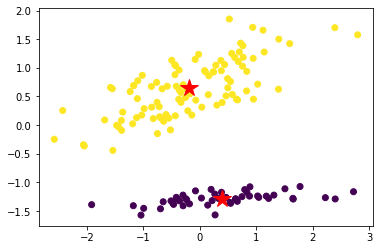

In [75]:
plt.scatter(new_data['x'], new_data['y'], c = kmeans.labels_, cmap = 'viridis')
for i, point in enumerate(center):
    plt.plot(center[i][0], center[i][1], '*r--', linewidth=2, markersize=18)
    
plt.show()

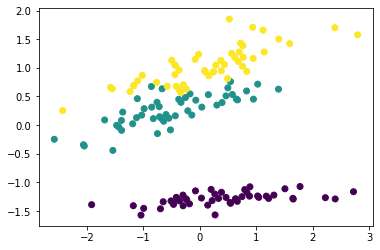

In [77]:
plt.scatter(new_data['x'], new_data['y'], c = new_data['clusters'], cmap = 'viridis')

### How do I choose right value of k i.e. clusters ? 

assuming we have inputs x_1, x_2, x_3, ..., x_nx

- Step 1 - Pick K random points as cluster centers called centroids.
- Step 2 - Assign each x_i to nearest cluster by calculating its distance to each centroid.
- Step 3 - Find new cluster center by taking the average of the assigned points.
- Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

Most important, when to stop increasing K?

We often know the value of K. In that case we use the value of K. Else we use the Elbow Method.

We run the algorithm for different values of K(say K = 10 to 1) and plot the K values against SSE(Sum of Squared Errors). And select the value of K for the elbow point as shown in the figure.

In [79]:
SSE = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    print(kmeans.inertia_)

KMeans(n_clusters=1, random_state=42)

300.0


KMeans(n_clusters=2, random_state=42)

163.9797389781756


KMeans(n_clusters=3, random_state=42)

90.89577828862144


KMeans(n_clusters=4, random_state=42)

64.12200715333296


KMeans(n_clusters=5, random_state=42)

48.87970576676031


KMeans(n_clusters=6, random_state=42)

39.3657455144496


KMeans(n_clusters=7, random_state=42)

31.631732724130128


KMeans(random_state=42)

27.208251956419492


KMeans(n_clusters=9, random_state=42)

23.288250783447662


Text(0.5, 0, 'K (clusters)')

Text(0, 0.5, 'SEE')

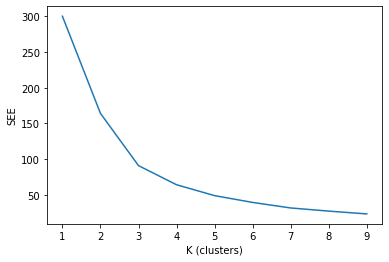

In [81]:
plt.plot(index, SSE)
plt.xlabel('K (clusters)')
plt.ylabel('SEE')

### We therefore confirm that the best number of clusters that can be segmented are 3